You may use any external libraries or GitHub codes. However, the evaluation will test your
knowledge of the algorithm and the choice of hyperparameters. Do cite the libraries/codes.

AIM: ​Understand and Perform different types of Adversarial Attacks, Detection and Mitigation.
Dataset: D-10 Dataset(​CLICK​ for Dataset) - 10 Class Animal Dataset
Reference Paper: ​Adversarial Attacks and Defenses in Deep Learning

b. Perform both ​targeted and ​untargeted attacks(on testing set) for any ​3 attacks ​among the following.​ [ 30 Marks]

i. L-BFGS algorithm
Szegedy C, Zaremba W, Sutskever I, Bruna J, Erhan D, Goodfellow I, et al. Intriguing properties of neural networks. 2013. arXiv:1312.6199.

ii. Fast gradient sign method
Goodfellow IJ, Shlens J, Szegedy C. Explaining and harnessing adversarial examples. 2014. arXiv:1412.6572.

iii. BIM and PGD
Kurakin A, Goodfellow I, Bengio S. Adversarial examples in the physical world. 2016. arXiv:1607.02533.

iv. Momentum iterative attack
Dong Y, Liao F, Pang T, Su H, Zhu J, Hu X, et al. Boosting adversarial attacks with momentum. In: Proceedings of the 2018 IEEE Conference on Computer Vision and Pattern Recognition; 2018 Jun 18–23; Salt Lake City, UT, USA; 2018. p. 9185–193.
  
v. Distributionally adversarial attack
Zheng T, Chen C, Ren K. Distributionally adversarial attack. 2018. arXiv:1808.05537.

vi. Carlini and Wagner attack
Carlini N, Wagner D. Towards evaluating the robustness of neural networks. In: Proceedings of the 2017 IEEE Symposium on Security and Privacy; 2017 May 22–26; San Jose, CA, USA; 2017. p. 39–57.

vii. Jacobian-based saliency map approach
Papernot N, McDaniel P, Jha S, Fredrikson M, Celik ZB, Swami A. The limitations of deep learning in adversarial settings. In: Proceedings of the 2016 IEEE European Symposium on Security and Privacy; 2016 Mar 21–24; Saarbrucken, Germany; 2016. p. 372–87.

In [1]:
# FGSM - https://www.tensorflow.org/tutorials/generative/adversarial_fgsm
# colab ref - https://colab.research.google.com/github/shreehari117/ML-2/blob/master/Sureshbabu_Shree_Hari_aml.ipynb
# https://colab.research.google.com/github/andantillon/cleverhans/blob/master/tutorials/future/tf2/notebook_tutorials/mnist_fgsm_tutorial.ipynb

from google.colab import drive 
drive.mount('/content/gdrive') 
import os
%cd '/content/gdrive/My Drive/DAI_ASSIGNMENT_2'
!ls
%cd '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images'
!ls
!find . -maxdepth 2 -type d
!find . -maxdepth 1 -mindepth 1 -type d -exec sh -c 'echo "{} : $(find "{}" -type f | wc -l)" file\(s\)' \;

# Install bleeding edge version of cleverhans
# !pip install cleverhans==2.1.0
!pip install cleverhans
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np

import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False
import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
#Install Cleverhans (version Cleverhans 2.1.0 is most compatable with Python 2.x)

import cleverhans

print("\nTensorflow Version: " + tf.__version__)
print("Cleverhans Version: " + cleverhans.__version__)
print("GPU Available: ", tf.test.is_gpu_available())
# from cleverhans.utils_keras import KerasModelWrapper
# from cleverhans.attacks import FastGradientMethod, MadryEtAl, CarliniWagnerL2


Mounted at /content/gdrive
/content/gdrive/My Drive/DAI_ASSIGNMENT_2
Classes.py  Images  processed_images
/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images
cleverhans  final_model.h5  test  train
.
./train
./train/cane
./train/cavallo
./train/elefante
./train/farfalla
./train/gallina
./train/gatto
./train/mucca
./train/pecora
./train/ragno
./train/scoiattolo
./test
./test/cane
./test/cavallo
./test/elefante
./test/farfalla
./test/gallina
./test/gatto
./test/mucca
./test/pecora
./test/ragno
./test/scoiattolo
./cleverhans
./cleverhans/.git
./cleverhans/.github
./cleverhans/assets
./cleverhans/cleverhans
./cleverhans/cleverhans_tutorials
./cleverhans/defenses
./cleverhans/docs
./cleverhans/docsource
./cleverhans/examples
./cleverhans/scripts
./cleverhans/tests_tf
./cleverhans/tutorials
./cleverhans/cleverhans.egg-info
./train : 15702 file(s)
./test : 10477 file(s)
./cleverhans : 424 file(s)
     |████████████████████████████████| 204kB 5.3MB/s 
     |█████████████████████████████

In [2]:
model = tf.keras.models.load_model('final_model.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [3]:
pretrained_model = model
pretrained_model.trainable = False
prediction_classes = [
           'cane',#0
           	 'elefante',#1
                'gallina',#2
                  'mucca', #3
                    'ragno',#4
                     'cavallo',#5
                      'farfalla',#6
           'gatto', #7
              'pecora',#8
                'scoiattolo'#9
]

def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = image[None, ...]
  return image


In [4]:
# image_path = '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images/test/cane/OIP-xjKAgPIdyArSOeG9W66qfgHaFH.jpeg'
image_path = '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images/test/cane/OIP-zsY8Glt0yKJU0hZwjmYeGgHaGc.jpeg'
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

image = preprocess(image)
image_probs = pretrained_model.predict(image)

In [5]:
image_probs

array([[0.48516655, 0.32246217, 0.00342547, 0.02062883, 0.01478333,
        0.01049882, 0.10858054, 0.01651611, 0.00155433, 0.01638386]],
      dtype=float32)

In [6]:
Y_pred = [[i.argmax()]for i in image_probs]

In [7]:
Y_pred[0][0]

0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


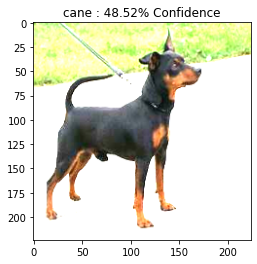

In [8]:
# original image looks like
plt.figure()
plt.imshow(image[0]*0.01+0.01) # To change [-1, 1] to [0,1]
image_class, class_confidence = prediction_classes[Y_pred[0][0]] , image_probs[0][Y_pred[0][0]]
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

# image_probs[0][0]
# image_probs[0][Y_pred[0][0]]

# FGSM

In [9]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

# Get the input label of the image.
cane_dog = 0
label = tf.one_hot(cane_dog, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))


In [10]:
label

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

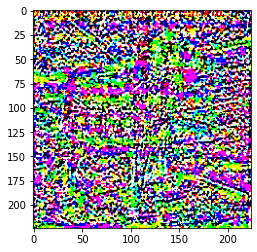

In [11]:

perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0]*0.5+0.5); 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


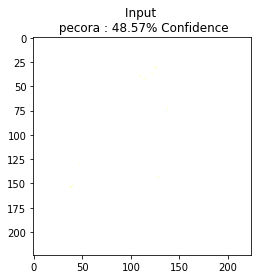

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


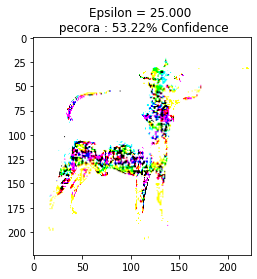

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


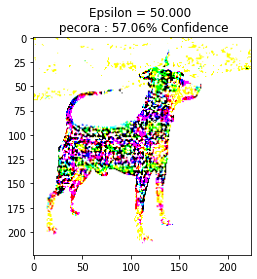

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


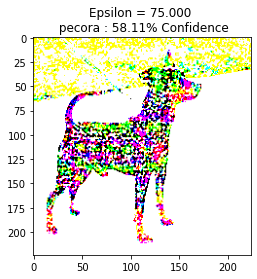

In [12]:
def display_images(image, description):
  probabs = pretrained_model.predict(image)
  # print (probabs)
  label = [[i.argmax()]for i in probabs]
  image_class = label
  # print(label)
  class_confidence = probabs[0][label[0][0]]
  # print(class_confidence)
  image_class, class_confidence = image_class, class_confidence 
  plt.figure()
  plt.imshow(image[0]*0.58+0.58)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   prediction_classes[image_class[0][0]], class_confidence*100))
  plt.show()

epsilons = [0, 25, 50, 75]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  display_images(adv_x, descriptions[i])

In [13]:
# for ref: CW Attack from scratch - https://nbviewer.jupyter.org/github/Harry24k/CW-pytorch/blob/master/CW.ipynb

In [14]:
# here I am following : colab ref - https://colab.research.google.com/github/shreehari117/ML-2/blob/master/Sureshbabu_Shree_Hari_aml.ipynb
# https://colab.research.google.com/github/shreehari117/ML-2/blob/master/Sureshbabu_Shree_Hari_aml.ipynb
# https://colab.research.google.com/github/andantillon/cleverhans/blob/master/tutorials/future/tf2/notebook_tutorials/mnist_fgsm_tutorial.ipynb
# https://harvard-iacs.github.io/2019-CS109B/lecture/lab21/AdversarialNN/

In [15]:
# wrap = KerasModelWrapper(pretrained_model)

In [16]:
# from tensorflow.python.keras import backend as K
# sess = K.get_session()